# Exercices

In [3]:
import math
import random 
import numpy as np
import matplotlib.pyplot as plt

Intégration numérique
- Séance 1: 

Q1: Écrire un programme qui calcule une intégrale de façon numérique en utilisant a) la 
règle du trapézoïde, b) la règle de Simpson, c) l’algorithme Hit-or-Miss, et d) un 
échantillonnage brut. Étudier l’écart entre le calcul numérique et la solution 
analytique. L'intégrale de $e^{-x}$ entre 0 et 1

       a) Intrégration trapézoide:

In [16]:

I = 0
a = 0
b = 1
i = 0
n = 10
x = np.linspace(0,1,n)
F = [0,0,0,0,0,0,0,0,0,0]
for i in range(0,n):
    F[i]=math.exp(-x[i])
for i in range(0,n):
    I = I + F[i]    
I = I-(F[0]/2)-(F[n-1]/2)
I = I*(b-a)/(n-1)
print(I)

0.6327707548481979


      b) Intégration Simpson:
   

In [17]:
I = 0
a = 0
b = 1
i = 0
n = 10
x = numpy.linspace(0,1,n)
f = [0,0,0,0,0,0,0,0,0,0]
for i in range(0,n):
    f[i] = math.exp(-x[i])
for i in range(0,int(n/2)):
    I = I+2*f[2*i]
for i in range(0,int(n/2)-1):
    I = I+4*f[2*i+1]
I = I - (f[0]/2)-(f[n-1]/2)
I = I*(b-a)/(n-1)*1/3
print(I)

    

0.6158205248086459


    c) Hit and miss:
    

In [4]:
a = 0
b = 1
n = 100
ymax = 1 #max de la fonction pour des x dans l'intervalle, on peut vérifier que pour ymax plus grand ça marche aussi
A = (b-a)*ymax
I = 0

for i in range(0,n):
    x = random.random()*(b-a)+a
    y = random.random()*ymax
    f = math.exp(-x)
    if y<f and x<b:
        N = 1
        I = I + N
    else:
        N = 0
        I = I + N
I = I*A/(n)
print(I)




0.64


    d) échantillonnage brut  

In [5]:
a = 0
b = 1
n = 100
A = (b-a)
I = 0
for i in range(0,n):
    x = random.random()*(b-a)+a
    f = math.exp(-x)
    I = I + f
I = I*A/(n)
print(I)


0.6144280147389739


Q2: Calculer le 2ème, le 3ème, et le 4ème coefficient du viriel en utilisant une méthode 
stochastique. Commenter les résultats en les comparant avec les résultats exacts.

- Seance 2:
    

Q1:Écrire un algorithme deterministe qui calcule 
c(N). Estimer le temps de calcul comme fonction de N.

In [6]:
M = 10000
N = 11
res = 0
vx = numpy.zeros((N,1))
vy = numpy.zeros((N,1))
for i in range(1,M):
    flag = True
    for j in range(1,N):
        R = random.randint(1,4)
        print("index",j,"R:",R)
        if R == 1:
            vx[j] = vx[j-1]+ 1
            vy[j] = vy[j-1]
            for l in range(0,j):
                if vx[j]==vx[l] and  vy[j]==vy[l]:
                    flag = False
        elif R == 2:
            vx[j] = vx[j-1]
            vy[j] = vy[j-1]+1
            for l in range(0,j):
                if vx[j]==vx[l] and vy[j]==vy[l]:
                    flag = False
        elif R == 3:
            vx[j] = vx[j-1]-1
            vy[j] = vy[j-1]
            for l in range(0,j):
                if vx[j]==vx[l] and vy[j]==vy[l]:
                    flag = False
        elif R == 4:
            vx[j] = vx[j-1]
            vy[j] = vy[j-1]-1
            for l in range(0,j):
                if vx[j]==vx[l] and vy[j]==vy[l]:
                    flag = False
    if flag == False:
        print(vx)
        print(vy)
        break
    else:
        res = res+1
c = res
print(c)

index 1 R: 2
index 2 R: 4
index 3 R: 1
index 4 R: 2
index 5 R: 1
index 6 R: 3
index 7 R: 3
index 8 R: 3
index 9 R: 3
index 10 R: 1
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 0.]
 [-1.]
 [-2.]
 [-1.]]
[[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
0


code de Kévin

In [4]:
import random
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("hls",6))
def check_validity(smth):
	# type(smth) must be list/array.
	boolean = True
	i = 0 
	j = 1
	l = 0
	curr = [0,0]
	smth_more = []
	while i<len(smth):
		curr = list(np.add(curr,smth[i]))
		smth_more.append(curr)
		
		i+=1
	while j<len(smth_more):
		while l<j:
			if smth_more[j] == smth_more[l]:
				boolean = False
				break
			l+=1
		l=0
		j +=1

	return boolean



def polymer(len_chain,nb_attempts):
# This routine will try to create polymer of len_chain elements 
# (which do not super-impose) x times (depending on nb_attempts)
	
	m = len_chain
	n = nb_attempts	
	# init
	i = 0
	j = 0
	success = 0
	temp = [[0,0]]
	#main loop
	while i<nb_attempts:
		# i-th attempt

		while j<len_chain:
			# try to create a polymer chain
			rdm = int(3*random.random()+1)
			if rdm == 1:
				temp.append([0,1])  # up
			elif rdm == 2:
				temp.append([1,0])   # right
			elif rdm == 3:
				temp.append([0,-1]) # down
			else :
				temp.append([-1,0]) # left
			j+=1

		if check_validity(temp)!= False:
			success +=1
		# reset
		j = 0
		temp = []

		i +=1
	return success

#annexe : une petite fonction pour faire un plot
def my_plot(nb_attempts,maxSize_polymer):
	i = 2 # not interested in a monomer, at least 2 to make a polymer
	tempx=[]
	tempy=[]
	while i<maxSize_polymer:
		tempx.append(i)
		y = polymer(i,nb_attempts)
		tempy.append(y)
		i+=1
	plt.plot(tempx,tempy,label=str(nb_attempts))
	tempx=[]
	tempy=[]
	





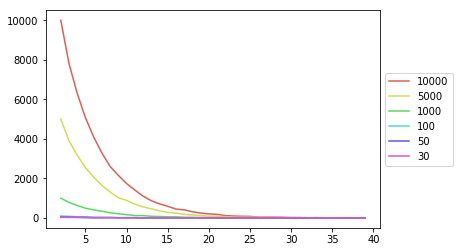

In [5]:

my_plot(10000,40)
my_plot(5000,40)
my_plot(1000,40)
my_plot(100,40)
my_plot(50,40)
my_plot(30,40)
plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5))
#plt.savefig("patate.png",format = "png",dpi=150,bbox_inches='tight')
plt.show()

  - Séance 3:

Q: Considérons un système fait de N = 10 boîtes qui peuvent absorber
des particules. Chaque boîte peut contenir au plus une particule avec une énergie égale à
En. Calculer K et acc pour les 3 algo.


[[0.000999  ]
 [0.00985801]
 [0.04352804]
 [0.11663512]
 [0.2047972 ]
 [0.24636625]
 [0.20585821]
 [0.11740812]
 [0.04391304]
 [0.00959501]
 [0.001042  ]]


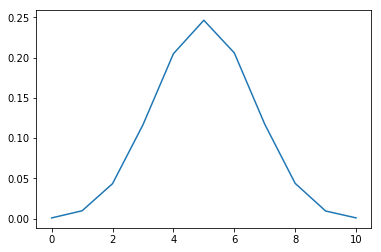

In [24]:
#Troisième algo:Met/Sup1
#On choisit combien de boîtes sont vides/remplies
V = 10 #Nombre de boîtes
M = 1000000 #nombre de frappe
N = 2 #nombre de bôite remplie
E = 0 #"Energie" vaut 0 ici car pas d'interaction avec les voisins donc dans l'acceptance exp() vaut 1
ntot = 0
P = np.zeros((V+1,1)) #Probabilité
for i in range(1,M):
    al = random.random() #On génère un nombre aléatoire
    if al < 0.5:       
        acc1 = min(1,(V-N)/(N+1)) #acceptance de N->N+1
        al2 = random.random()#On génère un autre nombre aléatoire
        if al2 < acc1:   
            N = N + 1 #On remplit donc le nombre de boîte remplie augmente
    else:        
        acc2 = min(1,N/(V-N+1)) #acceptance de N-1 -> N
        al2 = random.random() 
        if al2 < acc2:
            N = N - 1 #On enlève donc le nombre de boîte remplie diminue
    P[N] = P[N]+1 
    ntot = ntot+1 #nombre total

P = P/ntot
print(P)
x = np.arange(0, V+1, 1)
plt.plot(x, P)
plt.show()

- Séance 4:


In [4]:
N = 10 #Nombre de frappe
L = 7 #taille de la boîte
Np = 100
x = np.zeros(Np)
y = np.zeros(Np)
z = np.zeros(Np)
xn = np.zeros(Np)
yn = np.zeros(Np)
zn = np.zeros(Np)
beta = 1
# r cut off doit être plus petit que L/2 
rcut = pow(2,7/6)  #la porté de l'interaction avec sigma = 1 qui est 2x la valeur minimale
vcut = 4*(pow(1/rcut,12)-pow(1/rcut,6)) #interaction  à rcut avec sigma = 1
En = 0
Nacc = 0
W = 0
overlap = True
#déplacement maximal qui doit être plus petit que la porté de l'interaction
xmax = 1 
ymax = 1
zmax = 1
Etot = 0
E = 0
ip = 1

In [5]:
def dist(x1,y1,z1,x2,y2,z2):
    dx = x1-x2
    if dx < -L/2:
        dx = dx+L
    elif dx > L/2:
        dx = dx-L
    dy = y1-y2
    if dy < -L/2:
        dy = dy+L
    elif dy > L/2:
        dy = dy-L
    dz = z1-z2
    if dz < -L/2:
        dz = dz+L
    elif dz > L/2:
        dz = dz-L
    d = np.sqrt((dx)**2+(dy)**2+(dz)**2)
    return d

In [9]:
def energie(x,y,z,i):
    for ip in range(1,Np):
        if ip != i: 
            x1 = x[i]
            y1 = y[i]
            z1 = z[i]
            x2 = x[ip]
            y2 = y[ip]
            z2 = z[ip]
            d = dist(x1,y1,z1,x2,y2,z2)
                #calcul de l'énergie
            if d < rcut:
                #calcul du potentiel VLJ(c) où epsilon vaut 1
                E = (4*(pow(1/d,12)-pow(1/d,6)))-vcut
            elif d > rcut:
                E = 0
            Etot = Etot + E
    return Etot

In [10]:
def deplacement(energie,Np,L):
    #On choisit une particule aléatoire
    i = np.randint(0,Np)
    #On calcul son énergie avant déplacement
    E = energie(x,y,z,i)
    #On définit la position après déplacement
    xn[i] = x[i] + (xmax*2*random.random()-1)% L #2rand-1 permet d'aller dans les deux sens
    yn[i] = y[i] + (ymax*2*random.random()-1)% L
    zn[i] = z[i] + (zmax*2*random.random()-1)% L
    #On calcul l'énergie à la nouvelle position
    En = energie(xn,yn,zn,i) 
    #On calcul l'acceptance métropolis
    acc = min(1,np.exp(-beta*(En-E)))
    #On génère un nombre aléatoire
    al = random.random(0,1)
    #On check si on accepte le déplacement ou pas et si oui on remplace les coordonnées de la particule i 
    #et on recalcul l'énergie totale du système
    if al < acc:
        xn[i] = x[i] 
        yn[i] = y[i]
        zn[i] = z[i]
        Nacc = Nacc + 1
        Etot = Etot +(En-E)
    W = W + 1 #nombre de marche
    return W,Etot,Nacc

In [11]:
i = 1
ip = 1
for i in range(1,Np):
    x[i] = random.randint(0,1)*L
    y[i] = random.randint(0,1)*L
    z[i] = random.randint(0,1)*L
for n in range(1,N):
    while overlap == True:
        X = random.randint(0,1)*L
        Y = random.randint(0,1)*L
        Z = random.randint(0,1)*L
        overlap = False
        for i in range(1,Np+1):
            Etot = energie(x,y,z,i)
            W,Etot,Nacc = deplacement(energie,Np,L)        
        print(Etot)